# Laboratorio 5 - Autocodificadores
## Data Science Sección 20
~ Samuel Chamale 21885

~ Adrian Rodriguez 21691

In [97]:
# Import necessary libraries
import pandas as pd
import numpy as np
from io import StringIO
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
from tensorflow.keras import regularizers

## Parte 1: Preparación de Datos

### 1.1 Cargar los datos en un DataFrame de Pandas

In [98]:
CSV_PATH = 'UK_foods.csv'

In [99]:
df = pd.read_csv(CSV_PATH) # Leer los datos del dataframe

In [100]:
# Renombrar la primera columna y establecerla como índice
df.rename(columns={'Unnamed: 0': 'Food'}, inplace=True)
df.set_index('Food', inplace=True)

In [101]:
# Mostrar las primeras filas del DataFrame
print("DataFrame Head:")
df.head()

DataFrame Head:


,England,Wales,Scotland,N.Ireland
Food,,,,
Cheese,105,103,103,66
Carcass_meat,245,227,242,267
Other_meat,685,803,750,586
Fish,147,160,122,93
Fats_and_oils,193,235,184,209


### 1.2 Realizar una exploración básica de los datos

In [102]:
# Mostrar información del DataFrame
print("\nDataFrame Info:")
df.info()


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, Cheese to Confectionery 
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   England    17 non-null     int64
 1   Wales      17 non-null     int64
 2   Scotland   17 non-null     int64
 3   N.Ireland  17 non-null     int64
dtypes: int64(4)
memory usage: 680.0+ bytes


In [103]:
# Comprobar valores faltantes en cada columna
print("\nValores faltantes en cada columna:")
print(df.isnull().sum())


Valores faltantes en cada columna:
England      0
Wales        0
Scotland     0
N.Ireland    0
dtype: int64


In [104]:
# Mostrar estadísticas descriptivas
print("\nEstadísticas Descriptivas:")
print(df.describe())


Estadísticas Descriptivas:
           England        Wales     Scotland    N.Ireland
count    17.000000    17.000000    17.000000    17.000000
mean    469.647059   503.941176   460.235294   429.941176
std     452.701466   463.859282   469.595907   479.896014
min      54.000000    64.000000    53.000000    41.000000
25%     156.000000   175.000000   147.000000   135.000000
50%     253.000000   265.000000   242.000000   209.000000
75%     685.000000   803.000000   566.000000   586.000000
max    1472.000000  1582.000000  1572.000000  1506.000000


### 1.3 Normalizar los datos

In [105]:
# Inicializar el StandardScaler
scaler = StandardScaler()

In [106]:
# Ajustar y transformar los datos
scaled_data = scaler.fit_transform(df.values)

In [107]:
# Crear un nuevo DataFrame con los datos escalados
df_scaled = pd.DataFrame(scaled_data, index=df.index, columns=df.columns)

In [108]:
# Mostrar las primeras filas de los datos escalados
print("\nDatos Escalados Head:")
print(df_scaled.head())


Datos Escalados Head:
                 England     Wales  Scotland  N.Ireland
Food                                                   
Cheese         -0.830281 -0.890961 -0.784142  -0.781715
Carcass_meat   -0.511509 -0.615412 -0.479033  -0.349984
Other_meat      0.490347  0.664561  0.636042   0.335201
Fish           -0.734650 -0.764297 -0.742436  -0.723721
Fats_and_oils  -0.629910 -0.597634 -0.606344  -0.474563


## Parte 2: Construcción del Autocodificador

### 2.1 Utilizar todas las observaciones para entrenar el modelo

In [109]:
# Usar todos los datos para entrenamiento
X_train = df_scaled.values

### 2.2 Definir la arquitectura del autocodificador

In [110]:
# Dimensión de entrada (número de características)
input_dim = X_train.shape[1]   # Debería ser 4

In [111]:
# Capa de entrada
input_layer = Input(shape=(input_dim,))

In [112]:
# Capas de codificación con regularización y normalización
encoded = Dense(2, activation='relu')(input_layer)  # Reducir directamente a 2 dimensiones

In [113]:
# Capas de decodificación con regularización y normalización
decoded = Dense(2, activation='relu')(encoded)
output_layer = Dense(input_dim, activation='linear')(decoded)

In [114]:
# Definir el modelo de autocodificador
autoencoder = Model(inputs=input_layer, outputs=output_layer)

In [115]:
# Definir el modelo de codificador para reducción de dimensionalidad
encoder = Model(inputs=input_layer, outputs=bottleneck)

In [116]:
# Mostrar resumen del modelo
print("\nResumen del Autocodificador:")
autoencoder.summary()


Resumen del Autocodificador:


Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 2)              │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 4)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28 (112.00 B)

 Trainable params: 28 (112.00 B)

 Non-trainable params: 0 (0.00 B)

### 2.3 Compilar y entrenar el modelo

In [117]:
# Compilar el autocodificador
autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse')

In [118]:
# Definimos las funciones de callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=20, restore_best_weights=True)

In [119]:
history = autoencoder.fit(
    X_train,
    X_train,
    epochs=500,
    batch_size=4,
    shuffle=True,
    verbose=0,  # Para no mostrar salida detallada
    callbacks=[early_stopping]
)

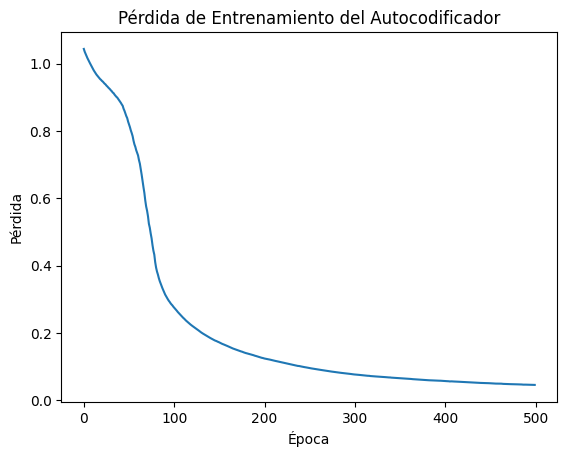

In [120]:
# Graficar la pérdida de entrenamiento
plt.figure()
plt.plot(history.history['loss'])
plt.title('Pérdida de Entrenamiento del Autocodificador')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.show()

### 2.4 Evaluar el rendimiento del autocodificador

In [121]:
# Reconstruir los datos de entrada
reconstructed_data = autoencoder.predict(X_train)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


In [122]:
# Calcular el Error Cuadrático Medio (MSE)
mse = tf.keras.losses.MeanSquaredError()
reconstruction_loss = mse(X_train, reconstructed_data).numpy()

In [123]:
print(f"\nPérdida de Reconstrucción (MSE): {reconstruction_loss}")


Pérdida de Reconstrucción (MSE): 0.04537665843963623
